# Лабораторная работа № 1
# Катаев Денис
## Дискретное программирование
### Вариант № 5
### Задача
Описание задачи
$$ 2x_1 + x_2 + x_3 + x_4 \rightarrow \max $$ 
При ограничениях
$$
x_1 + 3x_2 +        2x_4 \leqslant 10 \\
       x_2 + 4x_3 +  x_4 \leqslant 3  \\
x_j \geqslant 0, (j = 1,2,3,4)
$$




#### Этап 1. Решение без учета целочисленности
Сначала решим задачу без учета целочисленности. С помошью модуля для языка Python под названием PuLP, он использует различные подключаемые решатели линейных уравнений (CBC, GLPK, CPLEX, Gurobi и т.д) для решения линейных моделей.

In [295]:
# coding=utf-8
import pulp
from IPython.display import Markdown
from __future__ import division

x1 = pulp.LpVariable("x_1", 0)  # нижняя граница: 0
x2 = pulp.LpVariable("x_2", 0)  # нижняя граница: 0
x3 = pulp.LpVariable("x_3", 0)  # нижняя граница: 0
x4 = pulp.LpVariable("x_4", 0)  # нижняя граница: 0


def get_model():
    model = pulp.LpProblem("Lab1 Kataev Denis", pulp.LpMaximize)

    model += 2 * x1 +     x2 +     x3 +     x4, 'Целевая функция'

    model +=     x1 + 3 * x2 +          2 * x4 <= 10, "Первое ограничение"
    model +=              x2 + 4 * x3 +     x4 <= 3, "Второе ограничение"
    return model

model = get_model()
model.writeLP("model.lp")  # записываем модель в специальный формат
model.solve()  # запускаем оптимизацию
data = (pulp.LpStatus[model.status], ', '.join(str(v.varValue) for v in model.variables()))

Markdown(u"Статус: %s\n\n $x^0 = (%s)$" % data)

Статус: Optimal

 $x^0 = (10.0, 0.0, 0.75, 0.0)$

Данное решение не обладает свойством целочисленности, нарисуем область допустимых решений в проекции при 
$x_2 =0, x_4 = 0$

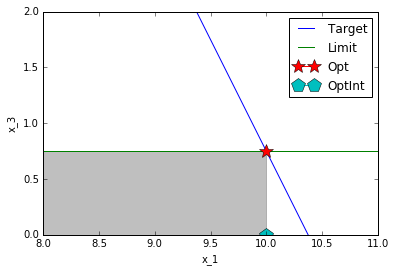

In [296]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

x_1 = np.arange(0, 40, 0.1)
tar = - 2 * x_1 + 20.75 
l_1 = tar >= 3/4
l_2 = 3/4 + 0 * x_1

plt.xlim(8, 11)
plt.ylim(0, 2)
plt.xlabel('x_1')
plt.ylabel('x_3')

ltar, = plt.plot(x_1, tar, label='target')
lx1, = plt.plot(x_1, l_2)
opt, = plt.plot(10, 3/4, marker='*', markersize=15, label='optimal')
opti, = plt.plot(10, 0, marker='p', markersize=15, label='optimalInt')
plt.legend([ltar, lx1, opt, opti], [u'Target', u'Limit', 'Opt', 'OptInt'])

plt.fill_between(x_1, l_2, where=l_1, color='gray', alpha='0.5')
plt.show()

На рисунке серым указано множество допустимых значений $G^0$ и показано звездочкой оптимальное нецелочисленное значение $x^0=(10, 0, 0.75, 0)$, а пентограммой оптимальное целочисленное $ x_i^0= (10, 0, 0, 0)$.

#### Этап 2. Ветвление
Разобьем исходное множество допустимых значений $G_0$ на два подмножества:
$$ G_0 = G_1 \cup G_2 $$ где $$ G_1 = \{x, x \in G_0, x_3 > 0 \}; G_2 = \{x, x \in G_0, x_3 = 0 \} $$
Решаем задачу на множестве $G_1$.

In [304]:
model_g1 = get_model()
model_g1 += x3 > 0, "Первое ограничение"
model_g1.writeLP("model_g1.lp")  # записываем модель в специальный формат
model_g1.solve()  # запускаем оптимизацию
data = (pulp.LpStatus[model_g1.status], ', '.join(str(v.varValue) for v in model_g1.variables()), pulp.value(model.objective))

Markdown(u"Статус: %s\n\n Оптимальное решение $x^1 = (%s)$, значение целевой функции %s" % data)

Статус: Optimal

 Оптимальное решение $x^1 = (10.0, 0.0, 0.75, 0.0)$, значение целевой функции 20.75

Полученное решение $x_1$ не обладает свойством целочисленности.

In [305]:
model_g2 = get_model()
model_g2 += x3 == 0, "kek"
model_g2.writeLP("model_g2.lp")  # записываем модель в специальный формат
model_g2.solve()  # запускаем оптимизацию
data = (pulp.LpStatus[model_g2.status], ', '.join(str(v.varValue) for v in model_g2.variables()), pulp.value(model.objective))

Markdown(u"Статус: %s\n\n Оптимальное решение $x^2 = (%s)$, значение целевой функции %s" % data)

Статус: Optimal

 Оптимальное решение $x^2 = (10.0, 0.0, 0.0, 0.0)$, значение целевой функции 20.0

Полученное оптимальное решение $x_2$ обладает свойством целочисленности. 

Наглядное представление схемы ветвлений решения задачи изображено на рисунке ниже.

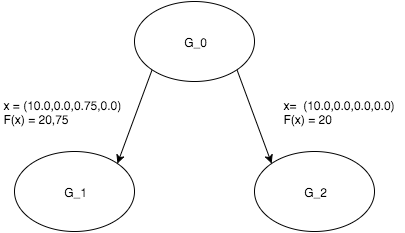

In [306]:
from IPython.display import Image
Image(filename='laba1_opt.png') 

#### Результат
Оптимальное целочисленное решение $x_0 = (10, 0, 0, 0)$ исходной задачи находится на множестве $G_2$, при этом $F(x_0) = 20$.